# Lab Test




## 0. Prerequisite

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## 문제 1
---

2 x 2 행렬을 나타내는 constant 를 정의하시오. 

단, 값은 1, 2, 3, 4 이며 타입은 float32 으로 하시오. 

* **출력형식**

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=array([[1., 2.],[3., 4.]], dtype=float32)>

---

## 문제 2
---
np.array[[1,2,3],[4,5,6]] 을 Variable 로 정의하시오.

* **출력형식**


<tf.Variable 'Variable:0' shape=(2, 3) dtype=int64, numpy=array([[1, 2, 3],[4, 5, 6]])>

---

## 문제 3
---
주어진 tensor 에서 특정 elements 를 추출하시오.

* **주어진 tensor**

```python
t1 = tf.constant([0, 1, 2, 3, 4, 5, 6, 7])

t2 = tf.constant([[0, 1, 2, 3, 4],
                [5, 6, 7, 8, 9],
                [10, 11, 12, 13, 14],
                [15, 16, 17, 18, 19]])

t3 = tf.constant([[[1, 3, 5, 7],
                   [9, 11, 13, 15]],
                  [[17, 19, 21, 23],
                   [25, 27, 29, 31]]
                  ])
```

* **출력형식**

t1 tf.Tensor([1 2 3], shape=(3,), dtype=int32)

t2 tf.Tensor( [[ 1 2] [ 6 7] [11 12]], shape=(3, 2), dtype=int32)

t3 tf.Tensor([[[25 27]]], shape=(1, 1, 2), dtype=int32)

---

## 문제 4
---
shape 이 3 x 16 x 16 인 tensor를 생성하시오.

단, 값은 모두 1로 설정하시오.

* **출력형식**


<tf.Tensor: shape=(3, 16, 16), dtype=float32, numpy=생략>

---

## 문제 5
---
shape 이 3 x 16 x 16 인 tensor를 3개 생성하시오.

* 첫 번째 tensor는 값이 모두 0 
* 두 번째 tensor는 값이 모두 1
* 세 번째 tensor는 값이 모두 2

단, 3개의 tensors를 하나의 tensor 에 저장하시오.

* **출력형식**

<tf.Tensor: shape=(3, 3, 16, 16), dtype=float32, numpy=생략>

## 문제 6
---
shape 이 3 x 16 x 16 인 tensor (dtype=int32) 를 8개 생성하시오.

* tensor의 값은 0~255 범위의 random 정수값

단, 8개의 tensors를 하나의 tensor 에 저장하시오.

* **출력형식**

<tf.Tensor: shape=(8, 3, 16, 16), dtype=int32, numpy=생략>

## 문제 7
---
shape 이 3 x 16 x 16 인 tensor (dtype=flaot32) 를 8개 생성하시오.

* tensor의 값은 -1~1 범위의 random 실수값

단, 8개의 tensors를 하나의 tensor 에 저장하시오.

* **출력형식**

<tf.Tensor: shape=(8, 3, 16, 16), dtype=int32, numpy=생략>

## 문제 8
---
주어진 MPG dataset을 이용하여 데이터를 분석하시오.

* 결측값을 찾아 해당 컬럼의 평균값으로 대체
* MPG, Cylinders, Horsepower, Weight 컬럼들의 합, 평균, 최솟값, 최댓값
* Horsepower 가 가장 큰 데이터의 row 번호 (0부터 시작)
* Horsepower 가 가장 큰 데이터 (하나임)

```python
#pip install -q seaborn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)
import tensorflow as tf

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)
raw_dataset.head()
# 결측값 처리
dataset = tf.Variable(raw_dataset)

```

## 문제 9
---
주어진 이미지를 이용하여 다음 값을 계산하시오.

* 각 채널(RGB) 별 이미지의 평균값 (3개)
* 각 채널(RGB)을 평균값으로 병합 (이미지 한개)

```python
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print(x_train.shape)
print(x_train[0,].shape)
image = x_train[3,]

fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(image)

```

# 과제 1

주어진 Auto MPG dataset 데이터 셋을 이용하여 자동차의 연비를 예측하는 모델을 구현하시오.


**제출**

구현한 코드가 담긴 colab 파일을 PLATO "텐서플로 과제 제출 게시판"에 제출하세요. (4/23까지)

**참고**

https://www.tensorflow.org/tutorials/keras/regression


```python
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)
```

In [4]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.12.0


In [5]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

30286/30286 [==============================] - 1s 37us/step


'C:\\Users\\SW\\.keras\\datasets\\auto-mpg.data'

In [6]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [7]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [10]:
dataset = dataset.dropna()

In [11]:
origin = dataset.pop('Origin')

In [12]:
dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


In [13]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

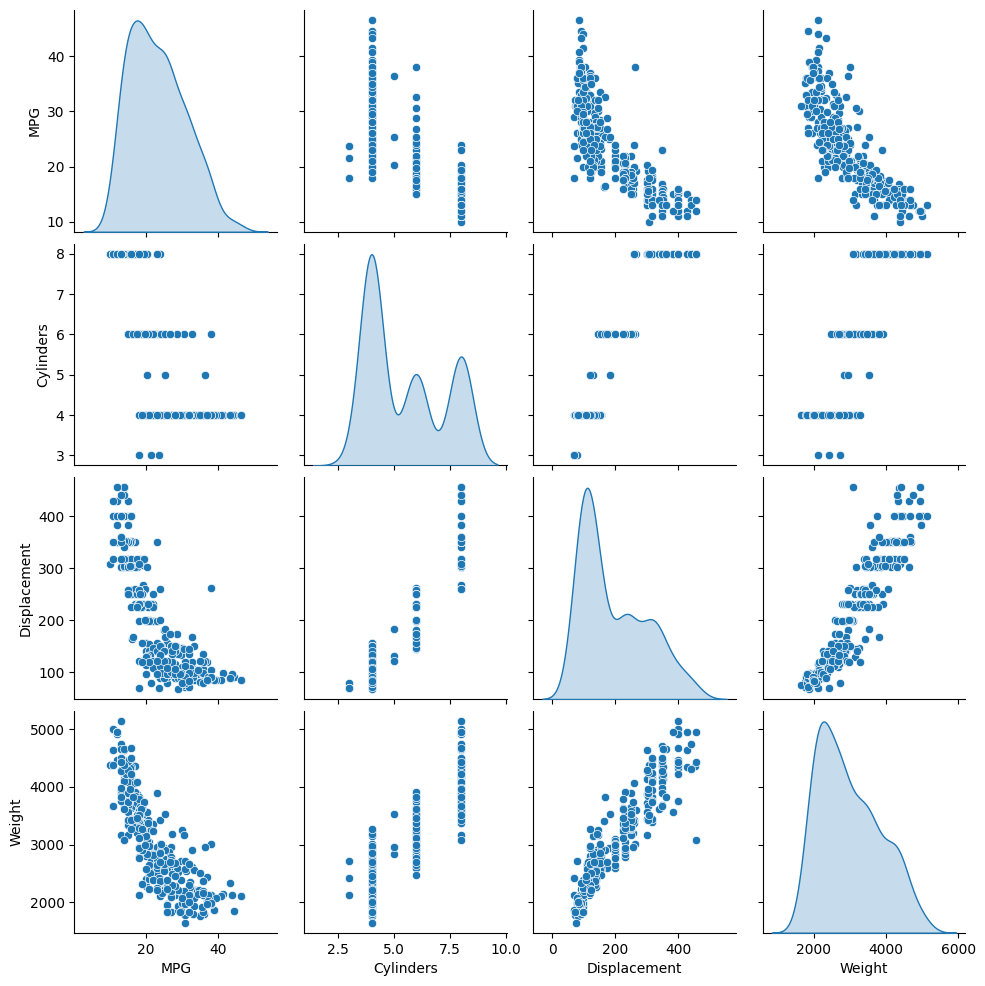

In [14]:
sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")

In [15]:
train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


In [16]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

In [17]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [18]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [19]:
model = build_model()

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [21]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

1/1 [==============================] - 0s 238ms/step


array([[ 0.03348909],
       [-0.13811243],
       [ 0.31385356],
       [-0.00067792],
       [ 0.06495945],
       [ 0.01540241],
       [ 0.05084771],
       [-0.27163795],
       [ 0.04327524],
       [ 0.07716189]], dtype=float32)

In [22]:
# 에포크가 끝날 때마다 점(.)을 출력해 훈련 진행 과정을 표시합니다
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [23]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,2.447609,0.981674,2.447609,10.049005,2.358959,10.049005,995
996,2.318683,0.945037,2.318683,9.531876,2.269122,9.531876,996
997,2.359087,0.974780,2.359087,9.657226,2.290876,9.657226,997
998,2.661816,1.055285,2.661816,9.569140,2.267750,9.569140,998
999,2.406386,0.989419,2.406386,9.549253,2.298121,9.549253,999


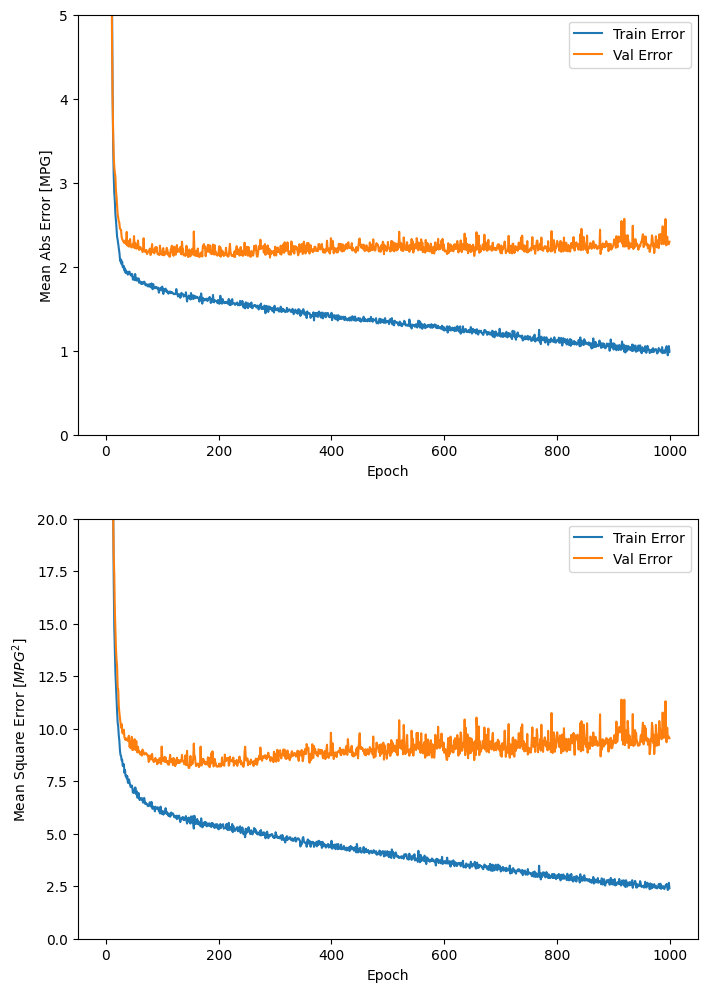

In [24]:
import matplotlib.pyplot as plt

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(8,12))

  plt.subplot(2,1,1)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.subplot(2,1,2)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()

plot_history(history)


.................................................

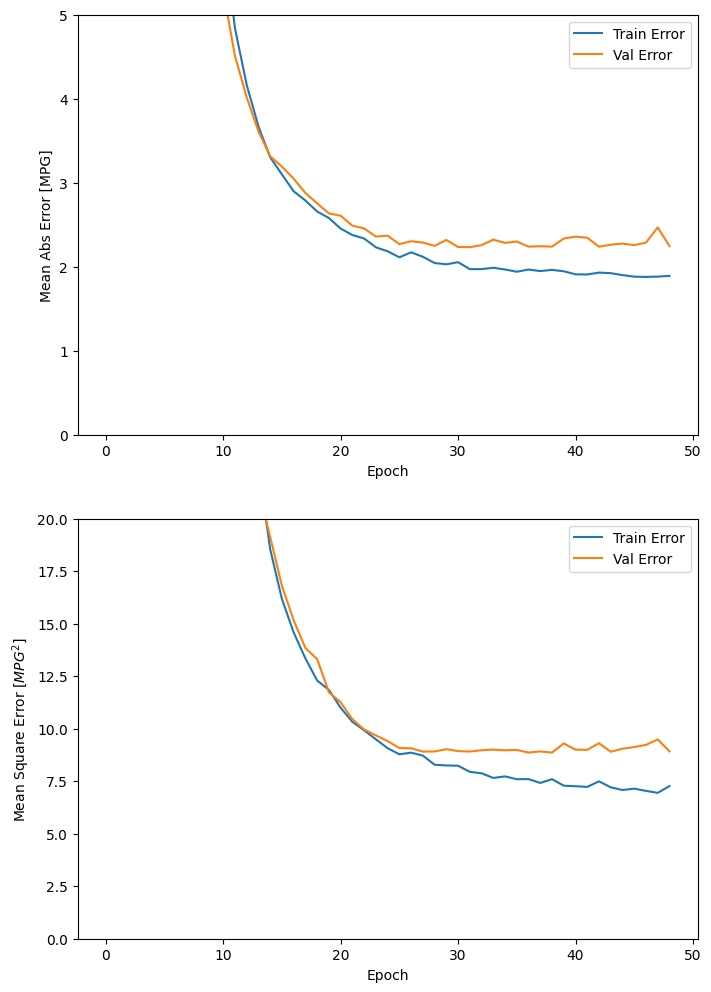

In [25]:
model = build_model()

# patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [26]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("테스트 세트의 평균 절대 오차: {:5.2f} MPG".format(mae))

3/3 - 0s - loss: 6.5343 - mae: 1.9993 - mse: 6.5343 - 18ms/epoch - 6ms/step
테스트 세트의 평균 절대 오차:  2.00 MPG


3/3 [==============================] - 0s 998us/step


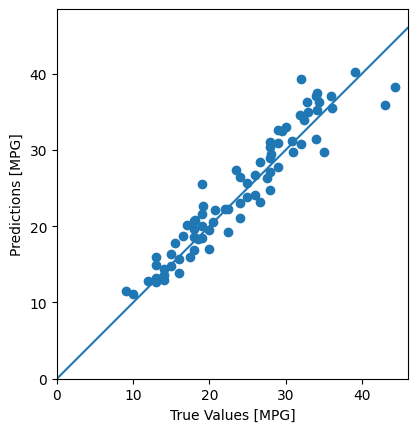

In [27]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

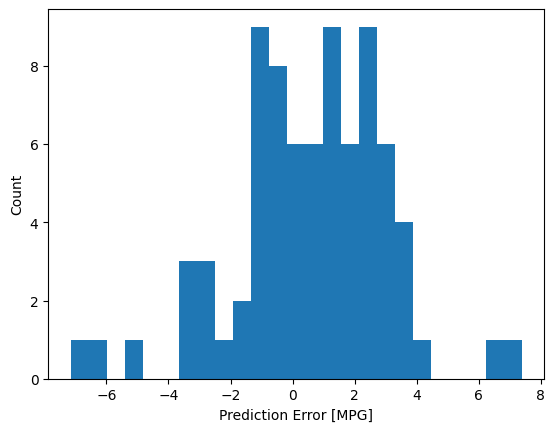

In [28]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")